# Pymaceuticals Analysis:

### Three Observable Trend based on the data:

1. Drug - Capomulin has shown significant reduction (19% reduction) in tumor volume over a 45 day treatment compared to other drugs. Whereas, other drugs has shown an increasing pattern in tumor volume.

2. Capomulin has show to control the spread of cancer cells. Infubinol is also effective in controlling the spread of cancer cells compared to Ketapril, Placebo drugs.

3. In terms of survival rate, capolmulin has shown better survival rates compared to other drugs and Infubinol has the lowest survival rates.



In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_combined = pd.merge(clinical_trial_data, mouse_drug_data, on='Mouse ID', how='left')

# Display the data table for preview
clinical_data_combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor_vol = clinical_data_combined.groupby(['Drug','Timepoint'])

mean_tumor_vol_df = mean_tumor_vol['Tumor Volume (mm3)'].mean()

In [3]:
# Convert to DataFrame

mean_tumor_vol_data = pd.DataFrame(mean_tumor_vol_df).reset_index()

In [4]:
mean_tumor_vol_data

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_tumor_vol = clinical_data_combined.groupby(['Drug','Timepoint'])

sem_tumor_vol_df = sem_tumor_vol['Tumor Volume (mm3)'].sem()


In [6]:
# Convert to DataFrame

sem_tumor_vol_data = pd.DataFrame(sem_tumor_vol_df).reset_index()

In [7]:
sem_tumor_vol_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Re-formatting the Data Frames

# computing mean for the plot
tumor_vol_data_formatted = mean_tumor_vol_data.pivot(index ='Timepoint', columns ='Drug')

mean_tumor_vol = tumor_vol_data_formatted['Tumor Volume (mm3)']
mean_tumor_vol

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
# computing standard error for the plot

sem_vol_Capomulin = sem_tumor_vol_data.loc[sem_tumor_vol_data['Drug']=='Capomulin']
sem_vol_Infubinol = sem_tumor_vol_data.loc[sem_tumor_vol_data['Drug']=='Infubinol']
sem_vol_Ketapril= sem_tumor_vol_data.loc[sem_tumor_vol_data['Drug']=='Ketapril']
sem_vol_Placebo = sem_tumor_vol_data.loc[sem_tumor_vol_data['Drug']=='Placebo']

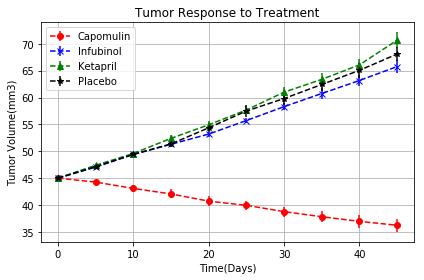

In [10]:
# Plot the graph

fig,ax = plt.subplots()

x_axis = mean_tumor_vol.index.values

tumor_vol_Capomulin = plt.errorbar(x=x_axis, y=mean_tumor_vol['Capomulin'], yerr=sem_vol_Capomulin['Tumor Volume (mm3)'], marker='o', color='red', linestyle='--', label='Capomulin')
tumor_vol_Infubinol = plt.errorbar(x=x_axis, y=mean_tumor_vol['Infubinol'], yerr=sem_vol_Infubinol['Tumor Volume (mm3)'], marker='x', color='blue', linestyle='--', label='Infubinol')
tumor_vol_Ketapril = plt.errorbar(x=x_axis, y=mean_tumor_vol['Ketapril'], yerr=sem_vol_Ketapril['Tumor Volume (mm3)'], marker='^', color='green', linestyle='--', label='Ketapril')
tumor_vol_Placebo = plt.errorbar(x=x_axis, y=mean_tumor_vol['Placebo'], yerr=sem_vol_Placebo['Tumor Volume (mm3)'], marker='*', color='black', linestyle='--', label='Placebo')

# Plot title, label and axis
plt.title('Tumor Response to Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume(mm3)')

plt.legend(handles=[tumor_vol_Capomulin, tumor_vol_Infubinol, tumor_vol_Ketapril, tumor_vol_Placebo], loc="best")
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/tumor_response.png")
plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_met_data = clinical_data_combined.groupby(['Drug','Timepoint'])

mean_met_df = mean_met_data['Metastatic Sites'].mean()


In [12]:
# Convert to DataFrame

mean_met_df = mean_met_df.reset_index()
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_met_data = clinical_data_combined.groupby(['Drug','Timepoint'])

sem_met_df = sem_met_data['Metastatic Sites'].sem()


In [14]:
# Convert to DataFrame

sem_met_df = sem_met_df.reset_index()
sem_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [15]:
#Re-formatting the Data Frames

# computing mean for the plot

met_data_formatted = mean_met_df.pivot(index ='Timepoint', columns ='Drug') 

mean_met_data = met_data_formatted['Metastatic Sites']
mean_met_data


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [16]:
# computing standard error for the plot

sem_met_Capomulin = sem_met_df.loc[sem_met_df['Drug']=='Capomulin']
sem_met_Infubinol = sem_met_df.loc[sem_met_df['Drug']=='Infubinol']
sem_met_Ketapril= sem_met_df.loc[sem_met_df['Drug']=='Ketapril']
sem_met_Placebo = sem_met_df.loc[sem_met_df['Drug']=='Placebo']


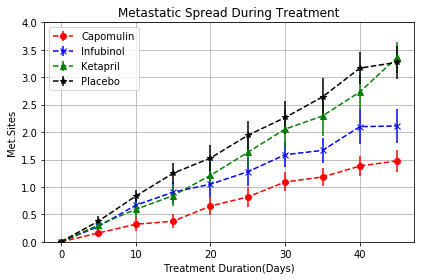

In [17]:
# Plot the graph

x_axis = mean_met_data.index.values

met_spread_Capomulin = plt.errorbar(x=x_axis, y=mean_met_data['Capomulin'], yerr=sem_met_Capomulin['Metastatic Sites'], marker='o', color='red', linestyle='--', label='Capomulin')
met_spread_Infubinol = plt.errorbar(x=x_axis, y=mean_met_data['Infubinol'], yerr=sem_met_Infubinol['Metastatic Sites'], marker='x', color='blue', linestyle='--', label='Infubinol')
met_spread_Ketapril = plt.errorbar(x=x_axis, y=mean_met_data['Ketapril'], yerr=sem_met_Ketapril['Metastatic Sites'], marker='^', color='green', linestyle='--', label='Ketapril')
met_spread_Placebo = plt.errorbar(x=x_axis, y=mean_met_data['Placebo'], yerr=sem_met_Placebo['Metastatic Sites'], marker='*', color='black', linestyle='--', label='Placebo')

# Plot title, label and axis
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Met.Sites')

plt.ylim(0, 4)
plt.legend(handles=[met_spread_Capomulin, met_spread_Infubinol, met_spread_Ketapril, met_spread_Placebo], loc="best")
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/metastatic_spread.png")
plt.show()


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint 

mice_count_data = clinical_data_combined.groupby(['Drug','Timepoint'])

mice_count_df = mice_count_data['Mouse ID'].count()


In [19]:
# Convert to DataFrame

mice_count_df = pd.DataFrame(mice_count_df).reset_index()

In [20]:
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Re-formatting the Data Frames

mice_count_data_formatted = mice_count_df.pivot(index ='Timepoint', columns ='Drug') 
mice_count_data_formatted = mice_count_data_formatted['Mouse ID']

mice_count_data_formatted


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [22]:
# DataFrame including the drugs of our interest

survival_rates_df = mice_count_data_formatted[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
survival_rates_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


In [23]:
# Calculate percentage changes for each drug

def to_percentage(first_val, val):
    pct = (val / first_val)*100
    return pct    

In [24]:
# implementing the function to compute percentage change 

survival_rates_df['Capomulin_%'] = survival_rates_df.apply(lambda survival_rates_row: to_percentage(survival_rates_df['Capomulin'][0], survival_rates_row['Capomulin']), axis=1)
survival_rates_df['Infubinol_%'] = survival_rates_df.apply(lambda survival_rates_row: to_percentage(survival_rates_df['Infubinol'][0], survival_rates_row['Infubinol']), axis=1)
survival_rates_df['Ketapril_%'] = survival_rates_df.apply(lambda survival_rates_row: to_percentage(survival_rates_df['Ketapril'][0], survival_rates_row['Ketapril']), axis=1)
survival_rates_df['Placebo_%'] = survival_rates_df.apply(lambda survival_rates_row: to_percentage(survival_rates_df['Placebo'][0], survival_rates_row['Placebo']), axis=1)

survival_rates_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_%,Infubinol_%,Ketapril_%,Placebo_%
Timepoint,,,,,,,,
0,25,25,25,25,100.0,100.0,100.0,100.0
5,25,25,23,24,100.0,100.0,92.0,96.0
10,25,21,22,24,100.0,84.0,88.0,96.0
15,24,21,19,20,96.0,84.0,76.0,80.0
20,23,20,19,19,92.0,80.0,76.0,76.0


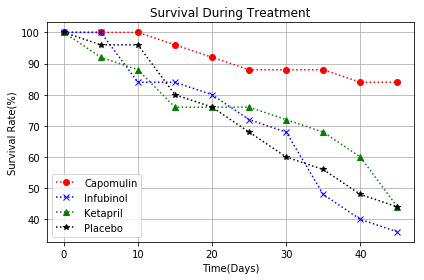

In [25]:
# Plot the graph

x_axis = survival_rates_df.index.values

survival_rate_Capomulin = survival_rates_df.plot(x=x_axis, y='Capomulin_%', marker='o', color='red', linestyle=':', label='Capomulin')
survival_rate_Infubinol = survival_rates_df.plot(x=x_axis, y='Infubinol_%', marker='x', color='blue', linestyle=':', ax=survival_rate_Capomulin, label='Infubinol')
survival_rate_Ketapril = survival_rates_df.plot(x=x_axis, y='Ketapril_%', marker='^', color='green', linestyle=':', ax=survival_rate_Capomulin, label='Ketapril',)
survival_rate_Placebo = survival_rates_df.plot(x=x_axis, y='Placebo_%', marker='*', color='black', linestyle=':', ax=survival_rate_Capomulin, label='Placebo')


# Plot title, label and axis
plt.title('Survival During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')

plt.grid()
plt.legend()
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/survival_rate.png")
plt.show()


## Summary Bar Graph

In [26]:
drug_df = tumor_vol_data_formatted['Tumor Volume (mm3)']
drug_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [27]:
drug_df = (drug_df.iloc[9,:] - drug_df.iloc[0,:]) / drug_df.iloc[0,:] * 100
drug_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [28]:
drug_check = drug_df[['Capomulin', 'Infubinol','Ketapril', 'Placebo']]


In [29]:
# categorize between passing and failing drugs

passing_drug = {}
failing_drug = {}
for i in range(len(drug_check)):
    if (drug_check[i] >= 0):
        key = drug_check.index[i] 
        value = drug_check[i]
        failing_drug.update({key:value})
    else:
        key = drug_check.index[i] 
        value = drug_check[i]
        passing_drug.update({key:value})
print("Passing Drugs: {}".format(passing_drug))
print("Failing Drugs:{}".format(failing_drug))



Passing Drugs: {'Capomulin': -19.475302667894173}
Failing Drugs:{'Infubinol': 46.12347172785184, 'Ketapril': 57.028794686606076, 'Placebo': 51.29796048315153}


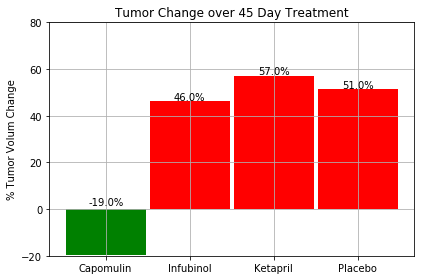

In [30]:
# Plot the graph

fig,ax = plt.subplots()

#setting label and axis for passing drug
xlabel = [key for key in passing_drug.keys()]
x_axis = [x for x in xlabel]


#setting label and axis for failing drug
x1_label = [key for key in failing_drug.keys()]
x1_axis = [x1 for x1 in x1_label]

#setting ylabel, title and ylim
ax.set_ylabel('% Tumor Volum Change')
ax.set_title('Tumor Change over 45 Day Treatment')
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
plt.ylim(-20, 80, 20)

width = 0.95     # the width of the bars
rects1 = plt.bar(x_axis, [value for value in passing_drug.values()], width, color='g', error_kw=dict(elinewidth=6, ecolor='pink'))

rects2 = plt.bar(x1_axis, [value for value in failing_drug.values()], width, color='r', error_kw=dict(elinewidth=6, ecolor='pink'))


def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
  
    for rect in rects:
        height = np.round_(rect.get_height())
        p_height = (height / y_height)
        
        # If we can fit the label above the column, do that; otherwise, put it inside the column.
        if p_height > 0.2: 
            label_position = height - (y_height * 0.001)
            space = -1
        else:
            label_position = height + (y_height * 0.2)
         
        ax.text(rect.get_x() + rect.get_width()/2., label_position, "{}%".format(height), ha='center', va='bottom')
        
plt.grid()
       
autolabel(rects1, ax)
autolabel(rects2, ax)

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/tumor_change_over_45day.png")
plt.show()
